In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


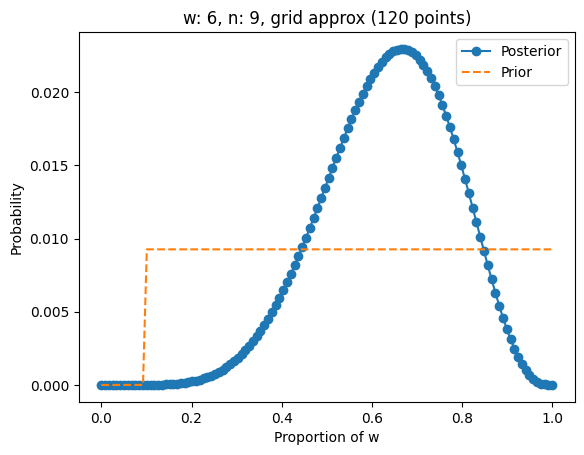

In [3]:
# Code 2.3

# Data
w, n = 6, 9
points = 120

# Grid approximation
p_grid = np.linspace(0, 1, points)
likelihood_pmf = stats.binom.pmf(w, n, p_grid)
prior = np.repeat(1, points)
prior = (np.linspace(0, 1, points) > 0.1).astype(int)  # We can assume, that there is more than 40% of water
unstd_posterior = likelihood_pmf * prior
posterior = unstd_posterior / unstd_posterior.sum()

# Visualisation
plt.plot(p_grid, posterior, 'o-', label='Posterior')
plt.plot(p_grid, prior / prior.sum(), "--", label='Prior')

plt.xlabel('Proportion of w')
plt.ylabel('Probability')
plt.title(f'w: {w}, n: {n}, grid approx ({points} points)')
plt.legend()

In [86]:
posterior_samples = np.random.choice(p_grid, p=posterior, size=1000, replace=True)

<Axes: >

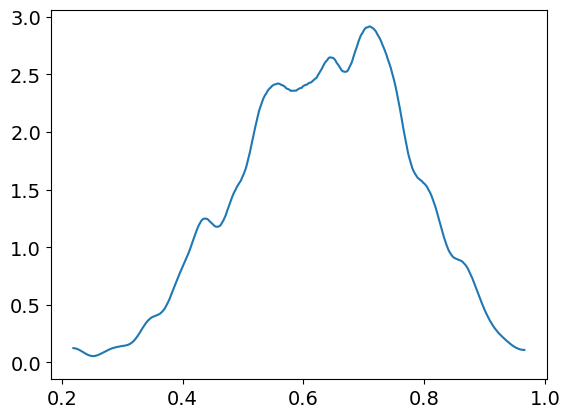

In [87]:
az.plot_kde(posterior_samples)

(array([  6.,  20.,  70.,  98., 183., 189., 211., 140.,  68.,  15.]),
 array([0.21848739, 0.29327731, 0.36806723, 0.44285714, 0.51764706,
        0.59243697, 0.66722689, 0.74201681, 0.81680672, 0.89159664,
        0.96638655]),
 <BarContainer object of 10 artists>)

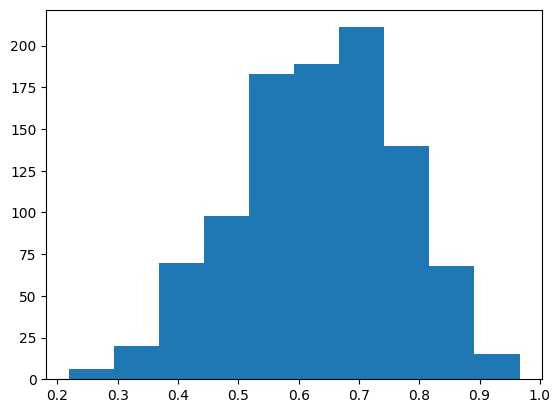

In [88]:
plt.hist(posterior_samples)

In [89]:
predicted_w = stats.binom.rvs(n=n, p=posterior_samples)
predicted_w

array([8, 8, 4, 6, 6, 8, 2, 8, 3, 6, 7, 7, 9, 4, 2, 6, 5, 4, 6, 6, 2, 5,
       4, 5, 6, 8, 2, 7, 3, 6, 8, 5, 2, 5, 5, 8, 4, 6, 9, 8, 2, 8, 2, 5,
       7, 4, 6, 8, 7, 7, 2, 5, 4, 7, 7, 5, 7, 8, 5, 3, 6, 6, 4, 8, 8, 7,
       7, 7, 4, 8, 5, 7, 4, 6, 5, 9, 9, 6, 5, 8, 4, 8, 4, 1, 2, 5, 4, 7,
       7, 5, 5, 8, 2, 8, 7, 4, 4, 6, 5, 7, 7, 4, 8, 6, 7, 4, 7, 6, 4, 6,
       7, 8, 8, 6, 7, 8, 3, 6, 6, 5, 6, 6, 8, 4, 8, 8, 2, 8, 5, 8, 3, 9,
       4, 6, 5, 5, 9, 5, 6, 3, 5, 5, 5, 8, 7, 2, 5, 5, 7, 2, 6, 8, 9, 4,
       5, 5, 5, 8, 6, 5, 7, 7, 6, 5, 5, 6, 5, 7, 4, 6, 6, 7, 6, 7, 7, 5,
       5, 6, 6, 5, 4, 5, 7, 8, 8, 4, 5, 7, 3, 8, 7, 5, 4, 9, 6, 6, 9, 6,
       6, 8, 6, 6, 3, 4, 5, 7, 4, 4, 6, 5, 5, 4, 7, 7, 2, 7, 6, 8, 4, 5,
       5, 6, 7, 8, 3, 5, 4, 4, 6, 5, 7, 5, 6, 3, 6, 6, 6, 4, 5, 4, 6, 5,
       5, 7, 9, 5, 6, 8, 4, 6, 6, 7, 5, 8, 8, 7, 9, 6, 2, 5, 5, 5, 2, 6,
       6, 4, 5, 6, 7, 7, 4, 4, 3, 5, 7, 4, 7, 4, 6, 6, 6, 8, 6, 7, 7, 7,
       7, 7, 6, 5, 5, 6, 6, 6, 6, 7, 6, 8, 6, 2, 4,

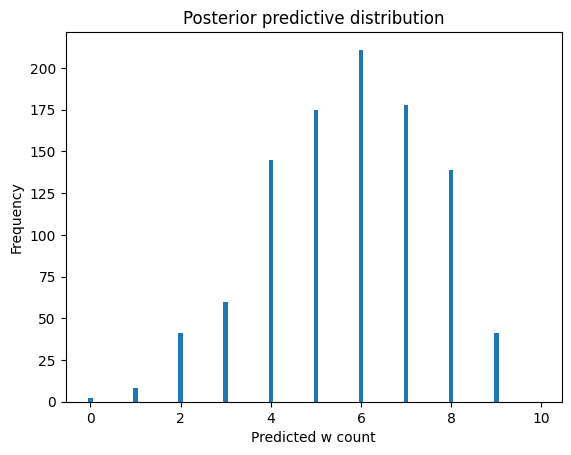

In [90]:
plt.hist(predicted_w, bins=np.arange(0, 11) - 0.1 / 2, width=0.1)

plt.title('Posterior predictive distribution')
plt.xlabel('Predicted w count')
plt.ylabel('Frequency')

plt.savefig('histogram')